## Download the data

In [1]:
!wget --header="Host: doc-14-ak-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://drive.google.com/uc?id=1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN&export=download" --header="Cookie: AUTH_j3go1ceeg08tu2h23vvnnksqb3ngj2va=01843316027174180138|1558929600000|5v26b0bvqq6ps2vq0ir96d3b3vts3nh6" --header="Connection: keep-alive" "https://doc-14-ak-docs.googleusercontent.com/docs/securesc/5od5lt780mbgh1f7a59l3d2afmsheno7/dadsm448pbttgi9n5afccevpp0cfda37/1558929600000/02500186615322573913/01843316027174180138/1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN?e=download" -O "train.zip" -c

--2019-05-29 03:54:17--  https://doc-14-ak-docs.googleusercontent.com/docs/securesc/5od5lt780mbgh1f7a59l3d2afmsheno7/dadsm448pbttgi9n5afccevpp0cfda37/1558929600000/02500186615322573913/01843316027174180138/1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN?e=download
Resolving doc-14-ak-docs.googleusercontent.com (doc-14-ak-docs.googleusercontent.com)... 172.217.160.193, 2404:6800:4009:80b::2001
Connecting to doc-14-ak-docs.googleusercontent.com (doc-14-ak-docs.googleusercontent.com)|172.217.160.193|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2019-05-29 03:54:18 ERROR 403: Forbidden.



In [2]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/game-of-deep-learning/" "https://datahack-prod.s3.amazonaws.com/test_file/test_ApKoW4T.csv" -O "test_ApKoW4T.csv" -c

--2019-05-27 04:30:01--  https://datahack-prod.s3.amazonaws.com/test_file/test_ApKoW4T.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074 (31K) [text/csv]
Saving to: ‘test_ApKoW4T.csv’

test_ApKoW4T.csv    100%[===================>]  31.32K  --.-KB/s    in 0.004s  

2019-05-27 04:30:01 (7.88 MB/s) - ‘test_ApKoW4T.csv’ saved [32074/32074]



In [3]:
!wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://datahack.analyticsvidhya.com/contest/game-of-deep-learning/" "https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_ns2btKE.csv" -O "sample_submission_ns2btKE.csv" -c

--2019-05-27 04:30:19--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_ns2btKE.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37443 (37K) [text/csv]
Saving to: ‘sample_submission_ns2btKE.csv’

sample_submission_n 100%[===================>]  36.57K  --.-KB/s    in 0.004s  

2019-05-27 04:30:19 (9.64 MB/s) - ‘sample_submission_ns2btKE.csv’ saved [37443/37443]



In [ ]:
!unzip train.zip -d data/

## Exploration

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
import os,shutil

# Fastai reloads
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Impost fastai
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from fastai.callbacks import *
from fastai.imports import *
from fastai.callbacks.mem import PeakMemMetric

from pathlib import Path

from torchvision.models import *
from torch.nn import CrossEntropyLoss
import cv2
import pretrainedmodels

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
import seaborn as sns

In [3]:
PATH=Path('data/')

In [5]:
os.listdir(PATH)

['dense121-stage2-history.csv',
 'rn50-praug-stage3-history.csv',
 'dense121-stage1-history.csv',
 'rn50-praug-stage1-history.csv',
 'test_ApKoW4T.csv',
 'images',
 'models',
 'sample_submission_ns2btKE.csv',
 'test_resized',
 'rn50-praug-stage4-history.csv',
 'train.csv',
 'dense121-stage3-history.csv',
 'train_resized',
 'rn50-praug-stage2-history.csv',
 'submission_resnet50.csv',
 'rn101-praug-stage2-history.csv',
 'rn101-praug-stage4-history.csv',
 '.ipynb_checkpoints',
 'rn101-praug-stage3-history.csv',
 'submission_resnet50_prg_aug.csv',
 'test',
 'dense121-stage4-history.csv',
 'rn50-stage3-history.csv',
 'rn50-stage1-history.csv',
 'rn50-stage4-history.csv',
 'rn50-stage2-history.csv',
 'submission_resnet101_prg_aug.csv',
 'rn101-praug-stage1-history.csv']

In [4]:
df_train=pd.read_csv(PATH/'train.csv')

In [7]:
df_train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [8]:
df_train.dtypes

image       object
category     int64
dtype: object

In [5]:
df_test=pd.read_csv(PATH/'test_ApKoW4T.csv')

In [10]:
df_test.head()

,image
0,1007700.jpg
1,1011369.jpg
2,1051155.jpg
3,1062001.jpg
4,1069397.jpg


In [11]:
len(os.listdir(PATH/'images'))

6252

In [12]:
len(df_train),len(df_test),len(df_train)+len(df_test)

(6252, 2680, 8932)

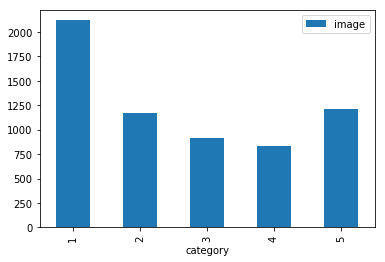

In [13]:
df_train.groupby('category').count().plot(kind='bar')

## Move the files to test folder

In [28]:
os.makedirs(PATH/'test',exist_ok=True)

In [61]:
test_img=[]
for i in range(len(df_test)):
    test_img.append(df_test.image.loc[i])

In [60]:
path = f'{PATH}/images/'
moveto = f'{PATH}/test/'
#files = test_pos
#files.sort()
for f in test_img:
    #print(str(f))
    src = path+f
    dst = moveto+f
   # print(f)
    shutil.move(src,dst)

In [13]:
len(os.listdir(path)),len(os.listdir(moveto))

NameError: name 'path' is not defined

In [12]:
PATH/'images'

PosixPath('data/images')

In [13]:
PATH

PosixPath('data')

## For train images

In [15]:
size_d={k: PIL.Image.open(PATH/'images'/k).size for k in os.listdir(PATH/'images')}

In [16]:
col_sz,row_sz=list(zip(*size_d.values()))
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)

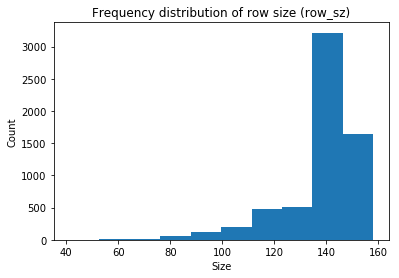

In [17]:
plt.hist(row_sz)
plt.title('Frequency distribution of row size (row_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

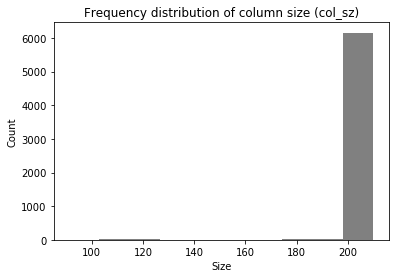

In [18]:
plt.hist(col_sz,color='gray')
plt.title('Frequency distribution of column size (col_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

In [19]:
PATH

PosixPath('data')

In [20]:
# Let us resize it column =150 and row=210
def resize_img(file):
    os.makedirs(PATH/'train_resized',exist_ok=True)
    img=cv2.imread(str(PATH)+'/images/'+file, cv2.IMREAD_UNCHANGED)
    resized=cv2.resize(img,(210, 150), interpolation = cv2.INTER_AREA)
    cv2.imwrite(str(PATH)+'/train_resized/'+file,resized)

In [21]:
for img in os.listdir(PATH/'images'):
    if img.endswith('.jpg'):
        resize_img(img)
    else:
        None    

## For test images

In [23]:
size_d={k: PIL.Image.open(PATH/'test'/k).size for k in os.listdir(PATH/'test/')}

In [24]:
col_sz,row_sz=list(zip(*size_d.values()))
row_sz=np.array(row_sz)
col_sz=np.array(col_sz)

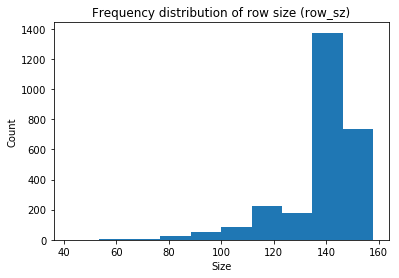

In [25]:
plt.hist(row_sz)
plt.title('Frequency distribution of row size (row_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

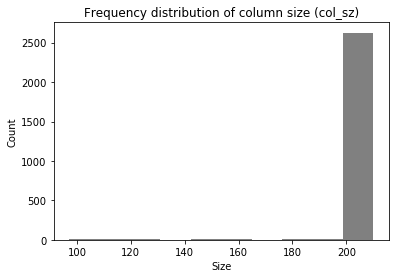

In [26]:
plt.hist(col_sz,color='gray')
plt.title('Frequency distribution of column size (col_sz)')
plt.xlabel('Size');plt.ylabel('Count')
plt.show()

In [27]:
# Test images are of similar distribution, let us resize
# Let us resize it column =210 and row=150
def resize_img(file):
    os.makedirs(PATH/'test_resized',exist_ok=True)
    img=cv2.imread(str(PATH)+'/test/'+file, cv2.IMREAD_UNCHANGED)
    resized=cv2.resize(img,(210, 150), interpolation = cv2.INTER_AREA)
    cv2.imwrite(str(PATH)+'/test_resized/'+file,resized)


In [28]:
for img in os.listdir(PATH/'test'):
    if img.endswith('.jpg'):
        resize_img(img)
    else:
        None  

In [55]:
len(os.listdir(PATH/'train_resized'))

6252

## Create Data block (Try with half size)

In [6]:
tfms=get_transforms(max_rotate=20,max_zoom=1.3,p_lighting=.8,
                    xtra_tfms=[cutout(n_holes=(1,4), length=(5, 10), p=.75), jitter(magnitude=0.005, p=.25)])

In [7]:
img=open_image(PATH/'train_resized'/os.listdir(PATH/'train_resized')[1])

In [8]:
img.shape

torch.Size([3, 150, 210])

In [9]:
src_size=np.array(img.shape[1:]);src_size

array([150, 210])

In [10]:
np.random.seed(42)
src = (ImageList.from_csv(PATH, 'train.csv', folder='train_resized')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' ')
      .add_test_folder('test_resized'))

In [17]:
'''
train_il = ImageList.from_df(df=df_train, cols='image', path=PATH/'train_resized')
test_il = ImageList.from_df(df=df_test, cols='image', path=PATH/'test_resized')

In [87]:
'''
np.random.seed(42)
src = (train_il
        .split_by_rand_pct(0.2)
        .label_from_df(cols='category')
        .add_test(test_il))

In [42]:
'''
np.random.seed(42)
src = (ImageList.from_df(df=df_train, cols='image', path=PATH/'images')
       .split_by_rand_pct(0.2)
       .label_from_df(cols='category')
      .add_test_folder('test_resized'))

In [11]:
data = (src.transform(tfms, size=src_size//2)
        .databunch(bs=256).normalize(imagenet_stats))

In [12]:
data.classes

['1', '2', '3', '4', '5']

In [21]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: EmptyLabelList
,,,,
Path: data

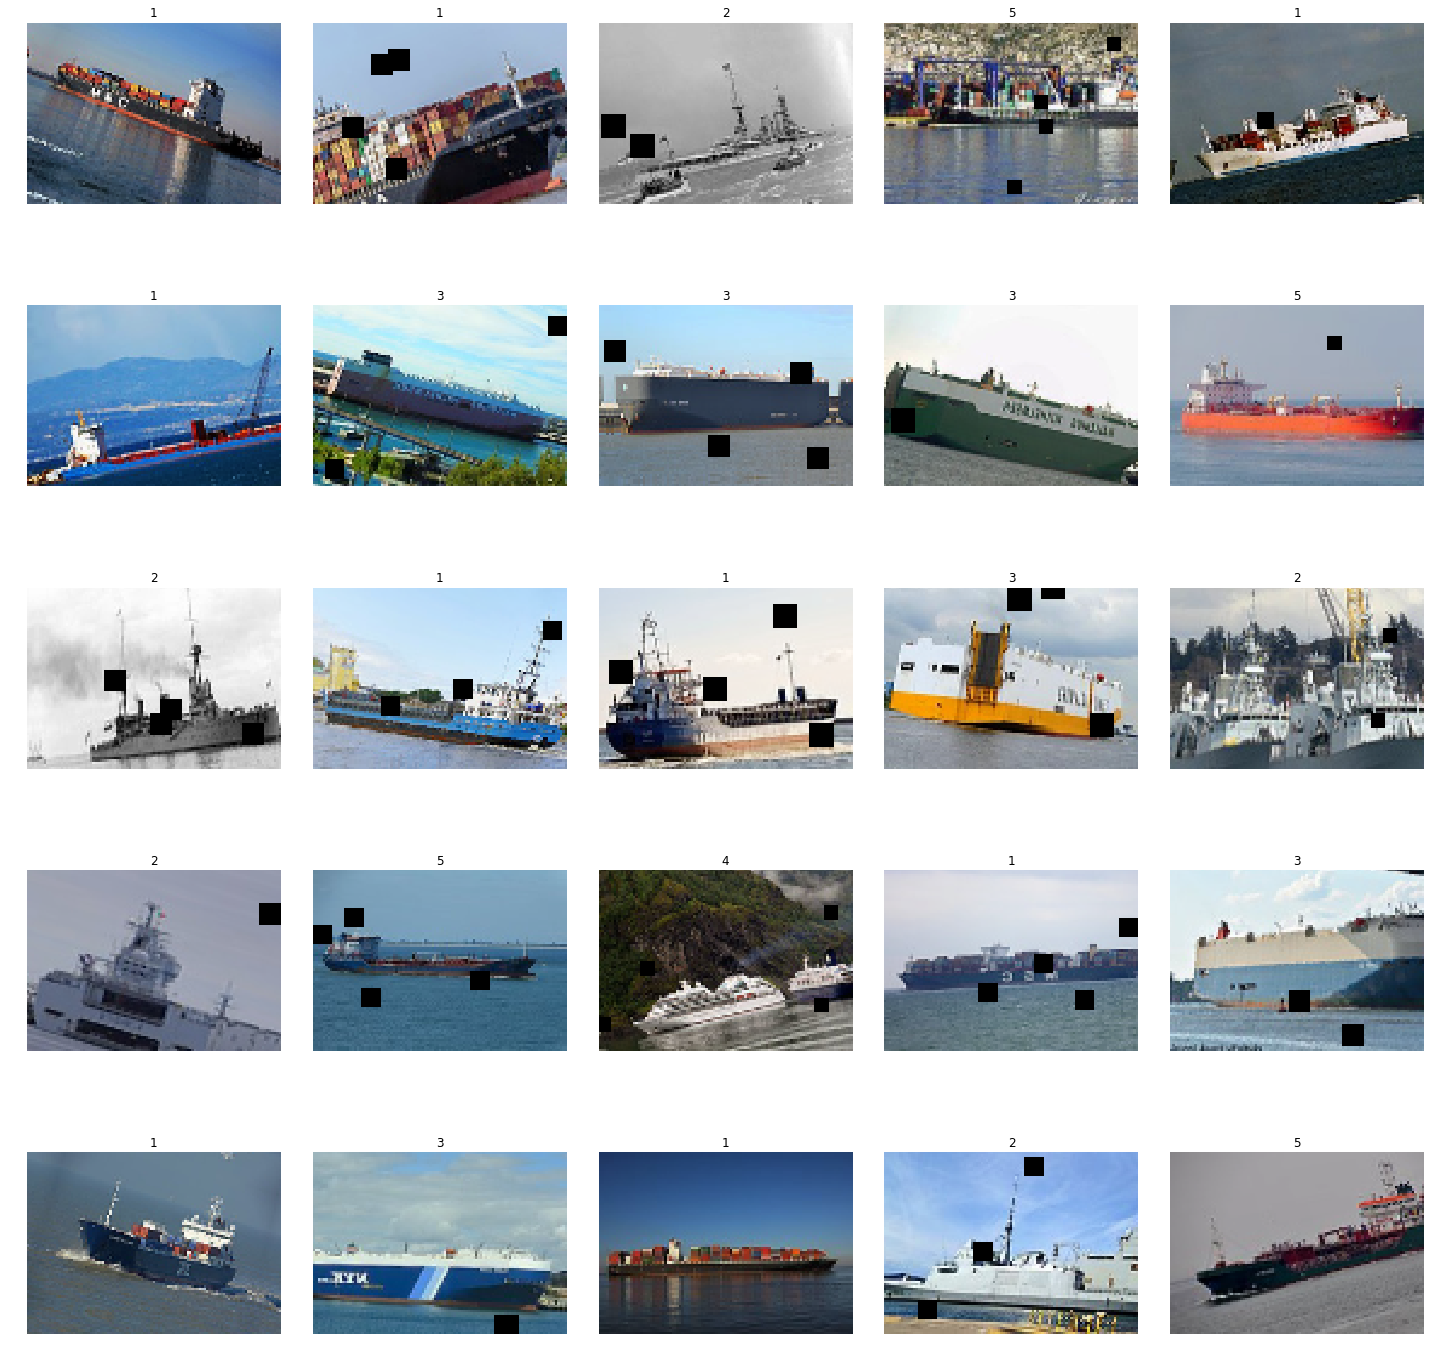

In [22]:
data.show_batch()

## Try with resnext101_32x4d

In [24]:
print(pretrainedmodels.model_names)

['fbresnet152', 'bninception', 'resnext101_32x4d', 'resnext101_64x4d', 'inceptionv4', 'inceptionresnetv2', 'alexnet', 'densenet121', 'densenet169', 'densenet201', 'densenet161', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'inceptionv3', 'squeezenet1_0', 'squeezenet1_1', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19_bn', 'vgg19', 'nasnetamobile', 'nasnetalarge', 'dpn68', 'dpn68b', 'dpn92', 'dpn98', 'dpn131', 'dpn107', 'xception', 'senet154', 'se_resnet50', 'se_resnet101', 'se_resnet152', 'se_resnext50_32x4d', 'se_resnext101_32x4d', 'cafferesnet101', 'pnasnet5large', 'polynet']


In [91]:
#f1 = partial(fbeta, thresh=0.2, beta = 1)

In [13]:
metrics_custom=[fbeta,accuracy_thresh]

In [14]:
def model_f(pretrained=True, **kwargs):
    return pretrainedmodels.__dict__['se_resnext101_32x4d'](num_classes=1000, pretrained='imagenet')

def getLearner(data):
    learn1 = cnn_learner(data, model_f, metrics=metrics_custom)
    return learn1

In [15]:
learn = getLearner(data)

In [44]:
stage1_rnext101_32_call_back=[CSVLogger(learn=learn, filename='rnext101_32-praug-stage1-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rnext101_32-praug_best_stage-1-aug'),
                          PeakMemMetric(learn)]

In [35]:
learn.wd,len(learn.layer_groups)

(0.01, 2)

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


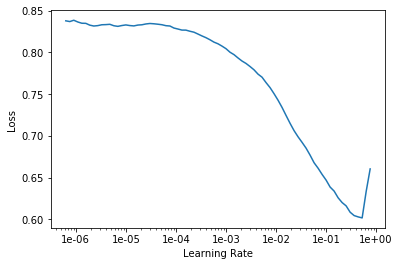

In [37]:
learn.recorder.plot()

In [38]:
lr=3e-2

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.680472,0.515267,0.629189,0.771040,0,0,80,9574,00:10
1,0.545421,0.343282,0.671562,0.847040,0,0,0,9610,00:10
2,0.454232,0.327852,0.716386,0.861280,0,0,0,9610,00:10
3,0.395184,0.295293,0.741657,0.872000,0,0,0,9610,00:10
4,0.357610,0.281936,0.764991,0.881440,0,0,0,9610,00:10
5,0.326679,0.261607,0.788914,0.886560,0,0,0,9610,00:10
6,0.301826,0.258573,0.796562,0.893600,0,0,0,9610,00:10
7,0.280470,0.233662,0.819371,0.904800,0,0,0,9610,00:10
8,0.260428,0.232327,0.825105,0.902400,0,0,0,9610,00:10
9,0.241525,0.216104,0.821029,0.911680,0,0,0,9610,00:10


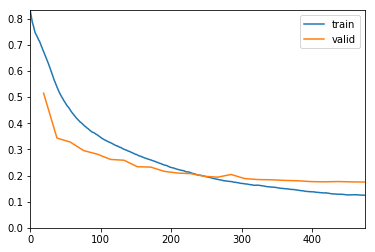

Better model found at epoch 0 with fbeta value: 0.6291888952255249.
Better model found at epoch 1 with fbeta value: 0.6715618968009949.
Better model found at epoch 2 with fbeta value: 0.7163857221603394.
Better model found at epoch 3 with fbeta value: 0.7416571974754333.
Better model found at epoch 4 with fbeta value: 0.764990508556366.
Better model found at epoch 5 with fbeta value: 0.7889143228530884.
Better model found at epoch 6 with fbeta value: 0.7965618968009949.
Better model found at epoch 7 with fbeta value: 0.8193714618682861.
Better model found at epoch 8 with fbeta value: 0.8251047730445862.
Better model found at epoch 10 with fbeta value: 0.8466238379478455.
Better model found at epoch 13 with fbeta value: 0.8520047068595886.
Better model found at epoch 14 with fbeta value: 0.8537142872810364.
Better model found at epoch 15 with fbeta value: 0.8606476783752441.
Better model found at epoch 16 with fbeta value: 0.8628953099250793.
Better model found at epoch 18 with fbeta va

AttributeError: 'NoneType' object has no attribute 'mixup'

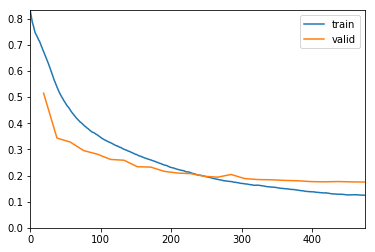

In [45]:
learn.fit_one_cycle(25,slice(lr),callbacks=stage1_rnext101_32_call_back).mixup().to_f16()

In [46]:
learn.unfreeze()

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


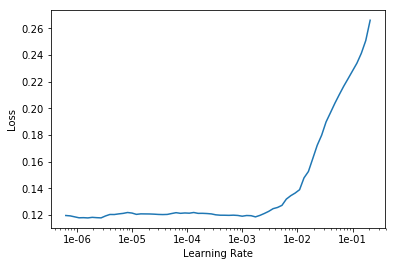

In [48]:
learn.recorder.plot()

In [49]:
learn.load('rnext101_32-praug_best_stage-1-aug')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105),Image (3, 75, 105)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (1): Sequential(
      (0): SEResNeXtBottleneck(
        (conv1)

In [50]:
lr=3e-4

In [51]:
stage2_rnext101_32_call_back=[CSVLogger(learn=learn, filename='rnext101_32-praug-stage2-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rnext101_32-praug_best_stage-2-aug'),
                          PeakMemMetric(learn)]

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.123683,0.174855,0.873962,0.934080,0,0,3318,6304,00:13
1,0.120104,0.173313,0.870191,0.934880,0,0,0,9610,00:13
2,0.113170,0.163493,0.888552,0.936000,0,0,0,9610,00:13
3,0.104173,0.168193,0.886971,0.943360,0,0,0,9610,00:13
4,0.096625,0.173015,0.878438,0.943680,0,0,0,9610,00:13
5,0.092457,0.160147,0.892057,0.945120,0,0,0,9610,00:13
6,0.081873,0.168162,0.892610,0.948960,0,0,0,9610,00:13
7,0.076426,0.166203,0.888171,0.948000,0,0,0,9610,00:13
8,0.067763,0.206952,0.871600,0.940000,0,0,0,9610,00:13
9,0.059432,0.195475,0.898400,0.955040,0,0,0,9610,00:13


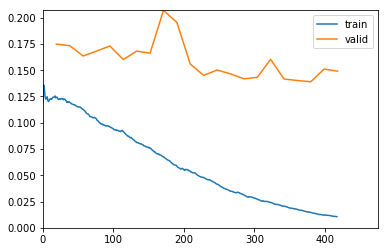

Better model found at epoch 0 with fbeta value: 0.8739619255065918.
Better model found at epoch 2 with fbeta value: 0.8885524272918701.
Better model found at epoch 5 with fbeta value: 0.8920572400093079.
Better model found at epoch 6 with fbeta value: 0.8926095962524414.
Better model found at epoch 9 with fbeta value: 0.8984000086784363.
Better model found at epoch 10 with fbeta value: 0.904209554195404.
Better model found at epoch 11 with fbeta value: 0.9142476320266724.
Better model found at epoch 12 with fbeta value: 0.915771484375.
Better model found at epoch 14 with fbeta value: 0.9176380634307861.
Better model found at epoch 15 with fbeta value: 0.924171507358551.
Epoch 21: early stopping


AttributeError: 'NoneType' object has no attribute 'mixup'

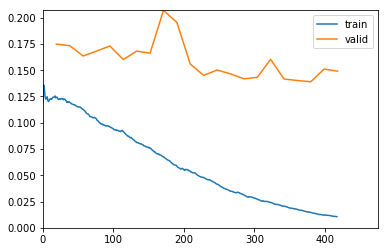

In [53]:
learn.fit_one_cycle(25,slice(lr,3e-2),callbacks=stage2_rnext101_32_call_back).mixup().to_f16()

## Pass full size image

In [16]:
data = (src.transform(tfms, size=src_size)
        .databunch(bs=64).normalize(imagenet_stats))

In [17]:
learn=learn.load('rnext101_32-praug_best_stage-2-aug')

In [18]:
model_summary(learn)

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 75, 105]        9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 75, 105]        128        True      
______________________________________________________________________
ReLU                 [64, 75, 105]        0          False     
______________________________________________________________________
MaxPool2d            [64, 37, 52]         0          False     
______________________________________________________________________
Conv2d               [128, 37, 52]        8,192      False     
______________________________________________________________________
BatchNorm2d          [128, 37, 52]        256        True      
______________________________________________________________________
Conv2d               [128, 37, 52]        4,608      False     
______________________________________________________________

In [19]:
learn.freeze()

In [58]:
model_summary(learn)

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 75, 105]        9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 75, 105]        128        True      
______________________________________________________________________
ReLU                 [64, 75, 105]        0          False     
______________________________________________________________________
MaxPool2d            [64, 37, 52]         0          False     
______________________________________________________________________
Conv2d               [128, 37, 52]        8,192      False     
______________________________________________________________________
BatchNorm2d          [128, 37, 52]        256        True      
______________________________________________________________________
Conv2d               [128, 37, 52]        4,608      False     
______________________________________________________________

In [20]:
learn.data=data

In [21]:
len(learn.layer_groups)

2

In [22]:
learn.data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [61]:
learn.metrics

[<function fastai.metrics.fbeta(y_pred:torch.Tensor, y_true:torch.Tensor, thresh:float=0.2, beta:float=2, eps:float=1e-09, sigmoid:bool=True) -> <function NewType.<locals>.new_type at 0x7fb0ac7b4ea0>>,
 <function fastai.metrics.accuracy_thresh(y_pred:torch.Tensor, y_true:torch.Tensor, thresh:float=0.5, sigmoid:bool=True) -> <function NewType.<locals>.new_type at 0x7fb0ac7b4ea0>>]

In [22]:
stage3_rnext101_32_call_back=[CSVLogger(learn=learn, filename='rnext101_32-praug-stage3-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rnext101_32-praug_best_stage-3-aug'),
                          PeakMemMetric(learn)]

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


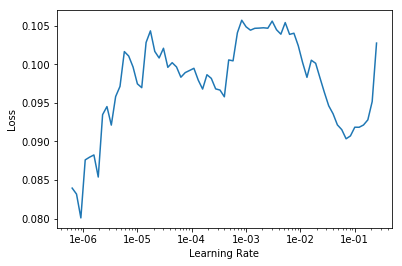

In [24]:
learn.recorder.plot()

In [25]:
lr=1e-7

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.108684,0.192416,0.893581,0.950880,0,0,70,9274,00:30
1,0.115480,0.195282,0.893543,0.951840,0,0,0,9142,00:29
2,0.110931,0.206394,0.888572,0.949280,0,0,0,9142,00:29
3,0.105403,0.199816,0.893238,0.950560,0,0,0,9142,00:29
4,0.106523,0.197357,0.893905,0.950720,0,0,0,9142,00:29
5,0.104786,0.195375,0.893143,0.950720,0,0,0,9142,00:29


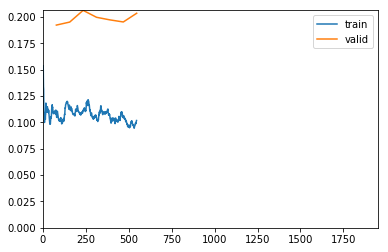

Better model found at epoch 0 with fbeta value: 0.8935810327529907.
Better model found at epoch 4 with fbeta value: 0.8939048051834106.
Epoch 6: early stopping


AttributeError: 'NoneType' object has no attribute 'mixup'

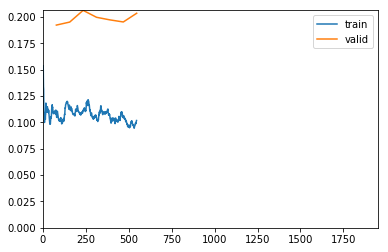

In [26]:
learn.fit_one_cycle(25,slice(lr),callbacks=stage3_rnext101_32_call_back).mixup().to_f16()

In [27]:
learn.load('rnext101_32-praug_best_stage-3-aug')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (1): Sequential(
      (0): SEResNeXtBottleneck(


In [28]:
learn.unfreeze()

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


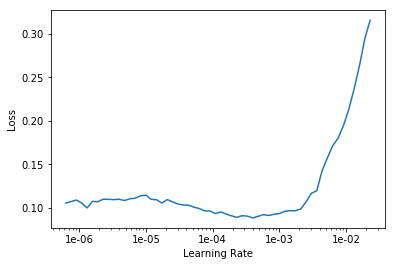

In [30]:
learn.recorder.plot()

In [76]:
lr=6e-5

In [31]:
stage4_rnext101_32_call_back=[CSVLogger(learn=learn, filename='rnext101_32-praug-stage4-history'), ShowGraph(learn=learn),
                       EarlyStoppingCallback(learn=learn,monitor='fbeta', min_delta=0.001, patience=5),
                          SaveModelCallback(learn,monitor='fbeta', mode='max',name='rnext101_32-praug_best_stage-4-aug'),
                          PeakMemMetric(learn)]

epoch,train_loss,valid_loss,fbeta,accuracy_thresh,cpu used,peak,gpu used,peak,time
0,0.103761,0.198384,0.892971,0.952160,0,0,2154,7014,00:40
1,0.100103,0.194430,0.895276,0.951520,0,0,0,9152,00:40
2,0.105307,0.196251,0.892267,0.951680,0,0,0,9152,00:40
3,0.099940,0.205249,0.890476,0.948480,0,0,0,9152,00:40
4,0.106071,0.196525,0.893276,0.951040,0,0,0,9152,00:40
5,0.106380,0.198316,0.890571,0.951040,0,0,0,9152,00:40
6,0.100459,0.201089,0.891638,0.951360,0,0,0,9152,00:40
7,0.105076,0.190629,0.899143,0.952960,0,0,0,9152,00:40
8,0.097136,0.187777,0.900038,0.952800,0,0,0,9152,00:40
9,0.097586,0.192804,0.896667,0.953600,0,0,0,9152,00:40


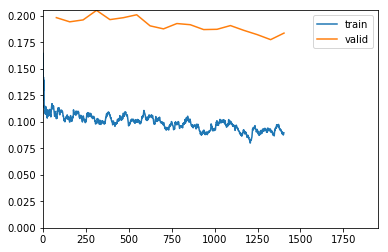

Better model found at epoch 0 with fbeta value: 0.8929714560508728.
Better model found at epoch 1 with fbeta value: 0.8952762484550476.
Better model found at epoch 7 with fbeta value: 0.8991429805755615.
Better model found at epoch 8 with fbeta value: 0.9000380039215088.
Better model found at epoch 11 with fbeta value: 0.9022715091705322.
Epoch 17: early stopping
Better model found at epoch 17 with fbeta value: 0.9024379849433899.


AttributeError: 'NoneType' object has no attribute 'mixup'

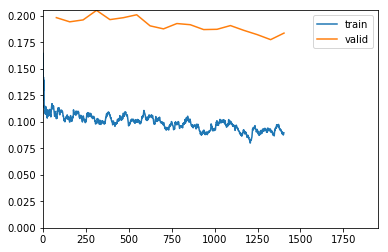

In [33]:
learn.fit_one_cycle(25,slice(lr,lr/10),callbacks=stage4_rnext101_32_call_back).mixup().to_f16()

In [34]:
learn.load('rnext101_32-praug_best_stage-4-aug')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace)
      (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    )
    (1): Sequential(
      (0): SEResNeXtBottleneck(


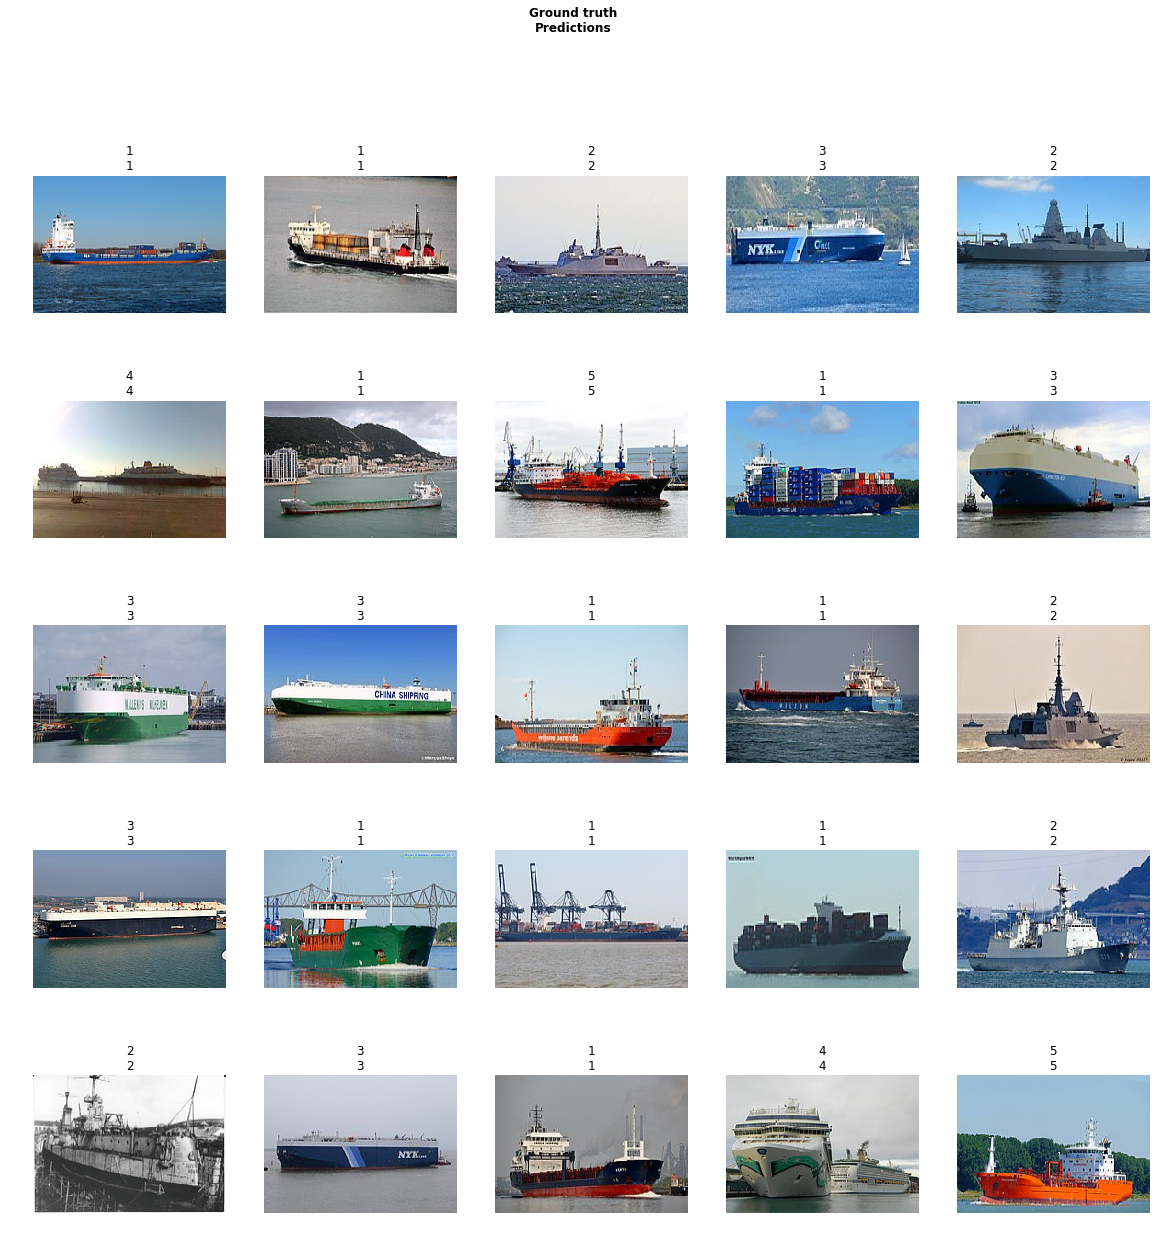

In [139]:
learn.show_results(3)

In [35]:
interp=ClassificationInterpretation.from_learner(learn,ds_type=DatasetType.Valid)

In [145]:
data

ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
1,1,2,3,2
Path: data;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: MultiCategoryList
4,1,1,3,4
Path: data;

Test: LabelList (2680 items)
x: ImageList
Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210),Image (3, 150, 210)
y: EmptyLabelList
,,,,
Path: data

In [36]:
losses,idxs = interp.top_losses()

In [37]:
len(data.valid_ds)==len(losses)==len(idxs)

False

In [153]:
pred_v,y,losses=learn.TTA(ds_type=DatasetType.Valid,with_loss=True)

In [38]:
test_pred_tta=learn.TTA(ds_type=DatasetType.Test)

In [39]:
test_pred_tta

(tensor([[9.9991e-01, 3.9010e-06, 2.2254e-06, 4.4741e-04, 7.2594e-07],
         [9.1186e-07, 4.1270e-01, 6.4263e-01, 4.5956e-07, 7.4213e-06],
         [9.0639e-01, 3.1892e-04, 2.1238e-02, 1.8726e-02, 8.3880e-03],
         ...,
         [2.6985e-01, 1.6037e-02, 4.8238e-01, 4.8603e-02, 9.1968e-02],
         [1.5390e-03, 9.9934e-01, 2.3228e-06, 1.8489e-05, 1.3217e-05],
         [8.1974e-01, 6.8701e-04, 4.3745e-04, 1.8033e-03, 1.4007e-01]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

In [40]:
preds = np.argmax(test_pred_tta[0], 1)
preds

tensor([0, 2, 0,  ..., 2, 1, 0])

In [41]:
a=array(preds)

array([1, 3, 2, 4, ..., 1, 3, 2, 1])

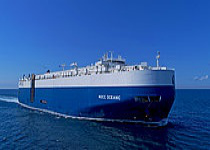

In [89]:
data.test_ds.x[1]

In [42]:
test_img_names = [Path(i).name for i in learn.data.test_ds.x.items]

In [43]:
submission = pd.DataFrame({'image': test_img_names, 'category': a+1})
submission.head(10)

,image,category
0,2904735.jpg,1
1,2890616.jpg,3
2,2902677.jpg,1
3,2741468.jpg,4
4,2802610.jpg,5
5,1630950.jpg,4
6,2882184.jpg,3
7,2787793.jpg,2
8,2866032.jpg,1
9,2369442.jpg,2


In [44]:
len(submission)

2680

In [45]:
submission.to_csv(PATH/'submission_resnext101_prg_aug.csv',index=False)

In [173]:
PATH.ls()

[PosixPath('data/test_ApKoW4T.csv'),
 PosixPath('data/images'),
 PosixPath('data/models'),
 PosixPath('data/sample_submission_ns2btKE.csv'),
 PosixPath('data/test_resized'),
 PosixPath('data/train.csv'),
 PosixPath('data/train_resized'),
 PosixPath('data/submission_resnet50.csv'),
 PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/test'),
 PosixPath('data/rn50-stage3-history.csv'),
 PosixPath('data/rn50-stage1-history.csv'),
 PosixPath('data/rn50-stage4-history.csv'),
 PosixPath('data/rn50-stage2-history.csv')]